# Î™©Ï∞®
1. library import
2. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
    - 2.1 Í≤∞Ï∏°Ïπò&Ï§ëÎ≥µ Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
    - 2.2 EDA
    - 2.3 Ï∂îÍ∞Ä Îç∞Ïù¥ÌÑ∞
    - 2.4 ÌååÏÉùÎ≥ÄÏàò ÏÉùÏÑ±
    - 2.5 ÏÉÅÍ¥Ä Î∂ÑÏÑù
    - 2.6 Î∂àÌïÑÏöî ÏπºÎüº Ï†úÍ±∞
    - 2.7 ÏàòÏπòÌòï Ï≤òÎ¶¨
    - 2.8 Î≤îÏ£ºÌòï Ï≤òÎ¶¨
    - 2.9 Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
3. Î™®Îç∏ÎßÅ
4. Î™®Îç∏ ÏòàÏ∏° Î∞è Ï†ÄÏû•
5. SHAP

# Î∂ÑÏÑù ÌôòÍ≤Ω: VScode Python

# 1.library import

In [1]:
# import
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
from catboost import CatBoostRegressor, Pool
import optuna

import platform
import shap

warnings.filterwarnings('ignore')

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# ÏãúÏä§ÌÖúÏóê Îî∞Îùº Ìè∞Ìä∏ ÏÑ§Ï†ï
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'  # ÏúàÎèÑÏö∞Ïùò Í∏∞Î≥∏ ÌïúÍ∏Ä Ìè∞Ìä∏
elif platform.system() == 'Darwin':  # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    plt.rcParams['font.family'] = 'NanumGothic'  # Î¶¨ÎàÖÏä§, Colab Îì±

plt.rcParams['axes.unicode_minus'] = False  # ÎßàÏù¥ÎÑàÏä§ Í∏∞Ìò∏ Íπ®Ïßê Î∞©ÏßÄ

In [ ]:
# Ï†úÍ≥µ Îç∞Ïù¥ÌÑ∞ import
call = pd.read_csv('\call119_train.csv', encoding = 'cp949', index_col = 0)
cat = pd.read_csv('\cat119_train.csv', encoding = 'cp949', index_col = 0)

# 2. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

### 2-1 Í≤∞Ï∏°Ïπò&Ï§ëÎ≥µ Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏

In [4]:
# Í≤∞Ï∏°Ïπò ÌôïÏù∏
call.isnull().sum()

call119_train.tm              0
call119_train.address_city    0
call119_train.address_gu      0
call119_train.sub_address     0
call119_train.stn             0
call119_train.ta_max          0
call119_train.ta_min          0
call119_train.ta_max_min      0
call119_train.hm_min          0
call119_train.hm_max          0
call119_train.ws_max          0
call119_train.ws_ins_max      0
call119_train.rn_day          0
call119_train.call_count      0
dtype: int64

In [5]:
cat.isnull().sum()

cat119_train.tm              0
cat119_train.address_city    0
cat119_train.address_gu      0
cat119_train.sub_address     0
cat119_train.cat             0
cat119_train.sub_cat         0
cat119_train.stn             0
cat119_train.call_count      0
dtype: int64

In [ ]:
# Îç∞Ïù¥ÌÑ∞ Ï†ïÎ≥¥ ÌôïÏù∏ 
call.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42924 entries, 1 to 42924
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   call119_train.tm            42924 non-null  int64  
 1   call119_train.address_city  42924 non-null  object 
 2   call119_train.address_gu    42924 non-null  object 
 3   call119_train.sub_address   42924 non-null  object 
 4   call119_train.stn           42924 non-null  int64  
 5   call119_train.ta_max        42924 non-null  float64
 6   call119_train.ta_min        42924 non-null  float64
 7   call119_train.ta_max_min    42924 non-null  float64
 8   call119_train.hm_min        42924 non-null  float64
 9   call119_train.hm_max        42924 non-null  float64
 10  call119_train.ws_max        42924 non-null  float64
 11  call119_train.ws_ins_max    42924 non-null  float64
 12  call119_train.rn_day        42924 non-null  float64
 13  call119_train.call_count    42924 no

In [7]:
cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61771 entries, 1 to 61771
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   cat119_train.tm            61771 non-null  int64 
 1   cat119_train.address_city  61771 non-null  object
 2   cat119_train.address_gu    61771 non-null  object
 3   cat119_train.sub_address   61771 non-null  object
 4   cat119_train.cat           61771 non-null  object
 5   cat119_train.sub_cat       61771 non-null  object
 6   cat119_train.stn           61771 non-null  int64 
 7   cat119_train.call_count    61771 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 4.2+ MB


In [8]:
# call + cat merge
call.columns = ['tm', 'address_city', 'address_gu', 'sub_address', 'stn', 'ta_max', 'ta_min',
                'ta_max_min', 'hm_min', 'hm_max', 'ws_max', 'ws_ins_max', 'rn_day', 'call_count']
cat.columns = ['tm', 'address_city', 'address_gu', 'sub_address', 'cat', 'sub_cat', 'stn', 'call_count']

df = call.merge(cat, on = ['tm', 'address_city', 'address_gu', 'sub_address'])
df = df.drop(['call_count_x', 'stn_y'], axis = 1)
df = df.rename(columns = {'stn_x' : 'stn', 'call_count_y':'call_count'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61771 entries, 0 to 61770
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tm            61771 non-null  int64  
 1   address_city  61771 non-null  object 
 2   address_gu    61771 non-null  object 
 3   sub_address   61771 non-null  object 
 4   stn           61771 non-null  int64  
 5   ta_max        61771 non-null  float64
 6   ta_min        61771 non-null  float64
 7   ta_max_min    61771 non-null  float64
 8   hm_min        61771 non-null  float64
 9   hm_max        61771 non-null  float64
 10  ws_max        61771 non-null  float64
 11  ws_ins_max    61771 non-null  float64
 12  rn_day        61771 non-null  float64
 13  cat           61771 non-null  object 
 14  sub_cat       61771 non-null  object 
 15  call_count    61771 non-null  int64  
dtypes: float64(8), int64(3), object(5)
memory usage: 7.5+ MB


In [9]:
# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ 
df = df.replace(-99, np.nan)
df = df.fillna(method='ffill')
df.describe()

tm           stn        ta_max        ta_min    ta_max_min  \
count  6.177100e+04  61771.000000  61771.000000  61771.000000  61771.000000   
mean   2.021578e+07    835.680934     26.487766     18.911379      7.576387   
std    1.086659e+04    259.170544      4.038878      4.725433      2.959963   
min    2.020050e+07    159.000000     12.300000      2.700000      0.000000   
25%    2.021052e+07    923.000000     23.700000     15.800000      5.400000   
50%    2.021102e+07    938.000000     26.700000     19.700000      7.500000   
75%    2.022102e+07    941.000000     29.400000     22.500000      9.600000   
max    2.023103e+07    950.000000     37.600000     29.000000     23.000000   

             hm_min        hm_max        ws_max    ws_ins_max        rn_day  \
count  61771.000000  61771.000000  61771.000000  61771.000000  61771.000000   
mean      57.142968     90.242955      4.747051      8.552536     10.000421   
std       17.496857      9.025431      2.329673      3.863257     27.933406   
min        2.300000     39.500000      1.200000      2.400000      0.000000   
25%       45.100000     85.900000      3.300000      6.100000      0.000000   
50%       58.200000     92.800000      4.200000      7.700000      0.000000   
75%       69.100000     97.100000      5.400000      9.900000      2.500000   
max       99.500000    100.000000     30.700000     37.800000    259.200000   

         call_count  
count  61771.000000  
mean       1.331936  
std        1.288823  
min        1.000000  
25%        1.000000  
50%        1.000000  
75%        1.000000  
max       72.000000

In [10]:
# Ï§ëÎ≥µ Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
before_train_size = df.shape[0]
df = df.drop_duplicates()
print(f'Ï§ëÎ≥µ Îç∞Ïù¥ÌÑ∞ Ï†úÍ±∞ Í∞úÏàò : {before_train_size - df.shape[0]}')
df.reset_index(drop=True, inplace=True)

Ï§ëÎ≥µ Îç∞Ïù¥ÌÑ∞ Ï†úÍ±∞ Í∞úÏàò : 0


In [11]:
df.head()

tm address_city address_gu sub_address  stn  ta_max  ta_min  \
0  20200501        Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú        Í∞ïÏÑúÍµ¨        ÎåÄÏ†Ä2Îèô  904    23.7    16.6   
1  20200501        Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú        Í∞ïÏÑúÍµ¨         Ï≤úÏÑ±Îèô  921    24.3    15.4   
2  20200501        Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú        Í∏àÏ†ïÍµ¨         Í∏àÏÇ¨Îèô  940    25.6    17.2   
3  20200501        Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú        Í∏àÏ†ïÍµ¨         Í∏àÏÑ±Îèô  941    25.3    17.1   
4  20200501        Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú        Í∏àÏ†ïÍµ¨         ÎÇ®ÏÇ∞Îèô  939    26.5    16.7   

   ta_max_min  hm_min  hm_max  ws_max  ws_ins_max  rn_day cat sub_cat  \
0         7.1    63.2    90.3     5.8        10.6     0.0  Íµ¨Í∏â    ÍµêÌÜµÏÇ¨Í≥†   
1         8.9    64.2    96.4     4.8         8.6     0.0  Íµ¨Ï°∞    ÍµêÌÜµÏÇ¨Í≥†   
2         8.4    46.6    76.4     4.8         8.3     0.0  Íµ¨Í∏â      Î∂ÄÏÉÅ   
3         8.2    46.6    76.4     7.1         9.7     0.0  Í∏∞ÌÉÄ    ÏóÖÎ¨¥Ïö¥Ìñâ   
4         9.8    46.6    76.4     5.7         8.1     0.0  Íµ¨Í∏â      Î∂ÄÏÉÅ   

   call_count  
0           1  
1           1  
2           1  
3           1  
4           1

### 2-2. EDA

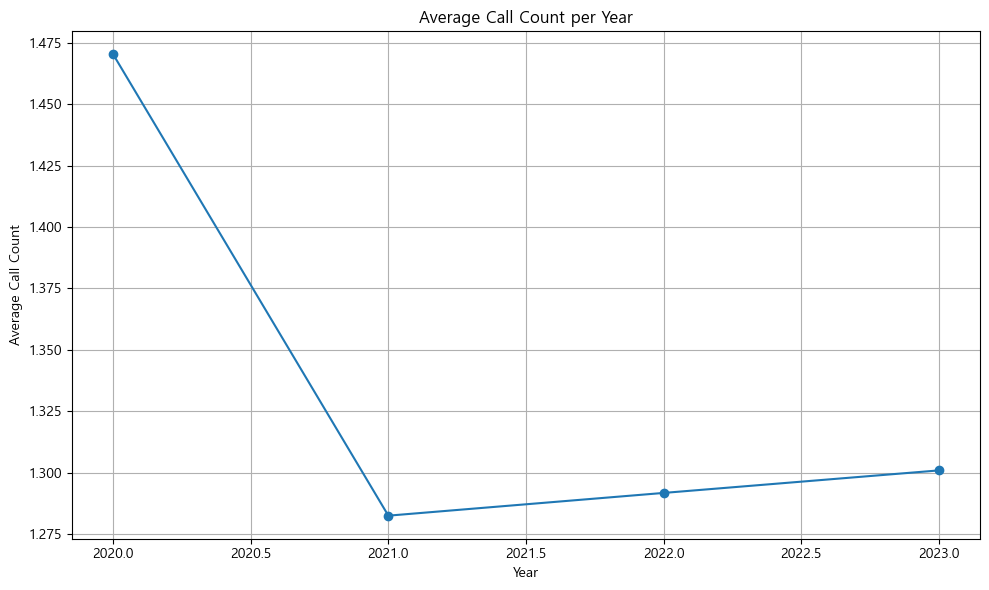

In [12]:
# Ïó∞ÎèÑÎ≥Ñ call count ÌèâÍ∑†
# ÎÇ†Ïßú ÌòïÏãùÏúºÎ°ú Î≥ÄÍ≤Ω
call['tm'] = pd.to_datetime(call['tm'].astype(str), format='%Y%m%d')
cat['tm'] = pd.to_datetime(cat['tm'].astype(str), format='%Y%m%d')

# ÎÖÑ, Ïõî, Ïùº Ï∂îÏ∂ú
call['year'] = call['tm'].dt.year
call['month'] = call['tm'].dt.month
call['day'] = call['tm'].dt.day

cat['year'] = cat['tm'].dt.year
cat['month'] = cat['tm'].dt.month
cat['day'] = cat['tm'].dt.day

# Ïó∞ÎèÑÎ≥Ñ  call_count ÌèâÍ∑†
yearly_avg = cat.groupby('year')['call_count'].mean()

# Í∑∏ÎûòÌîÑ Ï∂úÎ†•
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg.index, yearly_avg.values, marker='o')
plt.title('Average Call Count per Year')
plt.xlabel('Year')
plt.ylabel('Average Call Count')
plt.grid(True)
plt.tight_layout()
plt.show()

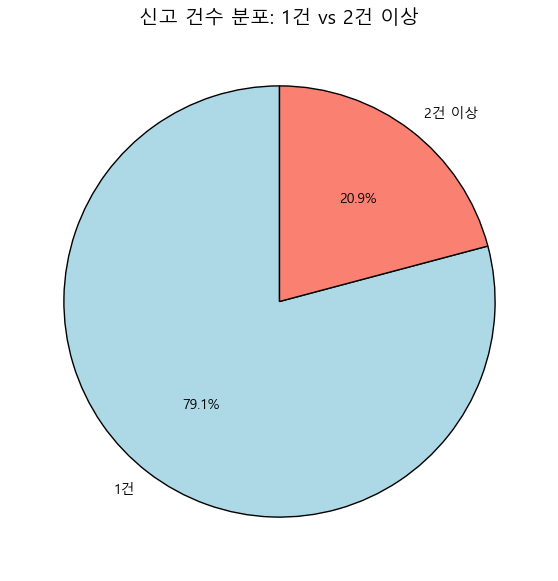

In [13]:
# 1Í±¥ / 2Í±¥ Ïù¥ÏÉÅ Î∂ÑÎ¶¨
count_1 = (df['call_count'] == 1).sum()
count_2plus = (df['call_count'] > 1).sum()

# Îç∞Ïù¥ÌÑ∞ Íµ¨ÏÑ±
counts = [count_1, count_2plus]
labels = ['1Í±¥', '2Í±¥ Ïù¥ÏÉÅ']

# ÏõêÌòï Ï∞®Ìä∏ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(7, 7))
plt.pie(counts,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=['lightblue', 'salmon'],
        wedgeprops={'edgecolor': 'k'})

plt.title('Ïã†Í≥† Í±¥Ïàò Î∂ÑÌè¨: 1Í±¥ vs 2Í±¥ Ïù¥ÏÉÅ', fontsize=14)
plt.show()

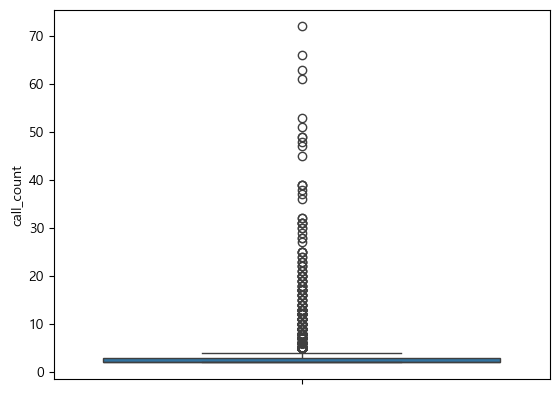

In [14]:
# callÍ±¥Ïàò >1 Ïù¥ÏÉÅ boxplot
target = df.pop('call_count')
sns.boxplot(target[target > 1])
plt.show()

<Axes: title={'center': 'Top 20 Ïã†Í≥† Ïú†Ìòï ÎπÑÏú®'}, ylabel='cat_sub'>

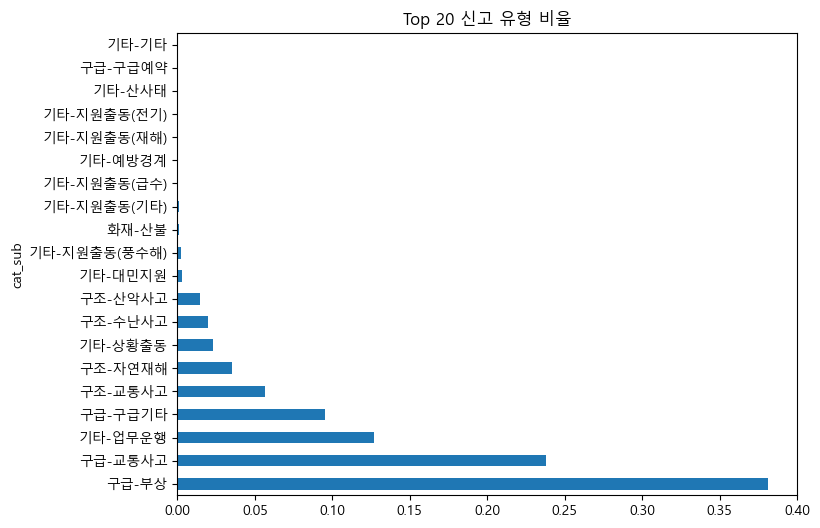

In [ ]:
# cat Í±¥Ïàò Î∂ÑÌè¨
# ÏãúÍ≥ÑÏó¥ ÏΩîÎìú ÎÑ£Í∏∞
# Ï†ÑÏ≤¥ Ïπ¥ÌÖåÍ≥†Î¶¨ ÎπàÎèÑ Î∞è ÎπÑÏú® ÌôïÏù∏
cat['cat_sub'] = cat['cat'] + '-' + cat['sub_cat']
cat_counts = cat['cat_sub'].value_counts(normalize=True)[:20]
cat_counts.plot(kind='barh', figsize=(8,6), title='Top 20 Ïã†Í≥† Ïú†Ìòï ÎπÑÏú®')

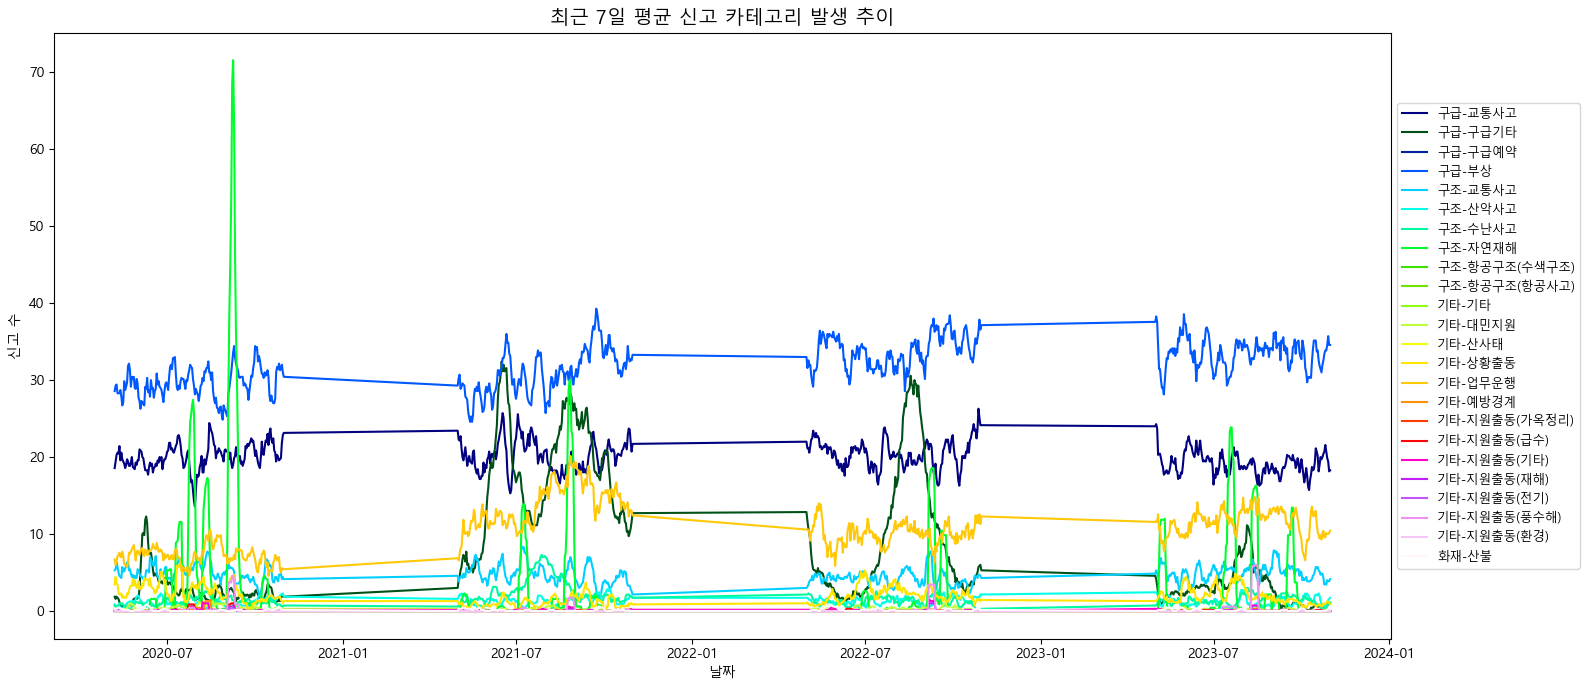

In [ ]:
# ÏãúÍ∞Ñ ÌùêÎ¶ÑÏóê Îî∞Î•∏ Ïπ¥ÌÖåÍ≥†Î¶¨ Î≥ÄÌôî ÌôïÏù∏
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

cat_trend = (
    cat.groupby(['tm', 'cat_sub']).size().unstack(fill_value=0)
)

# 1. 7Ïùº ÌèâÍ∑† rolling Í≥ÑÏÇ∞
cat_trend_rolling = cat_trend.rolling(7).mean()

# 2. Ïª¨Îüº ÏàòÏóê ÎßûÎäî ÏÉâÏÉÅ ÏÉùÏÑ± (e.g., 20Í∞úÎ©¥ 20ÏÉâ)
num_cats = len(cat_trend_rolling.columns)
color_map = cm.get_cmap('gist_ncar', num_cats)  # ÎòêÎäî 'tab10', 'Set3' Îì± Îã§ÏñëÌïú colormap Í∞ÄÎä•

# 3. Plot
plt.figure(figsize=(16, 7))
for i, col in enumerate(cat_trend_rolling.columns):
    plt.plot(cat_trend_rolling.index, cat_trend_rolling[col], label=col, color=color_map(i))

plt.title('ÏµúÍ∑º 7Ïùº ÌèâÍ∑† Ïã†Í≥† Ïπ¥ÌÖåÍ≥†Î¶¨ Î∞úÏÉù Ï∂îÏù¥', fontsize=14)
plt.xlabel('ÎÇ†Ïßú')
plt.ylabel('Ïã†Í≥† Ïàò')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=9)
plt.tight_layout()
plt.show()

<Figure size 1400x700 with 0 Axes>

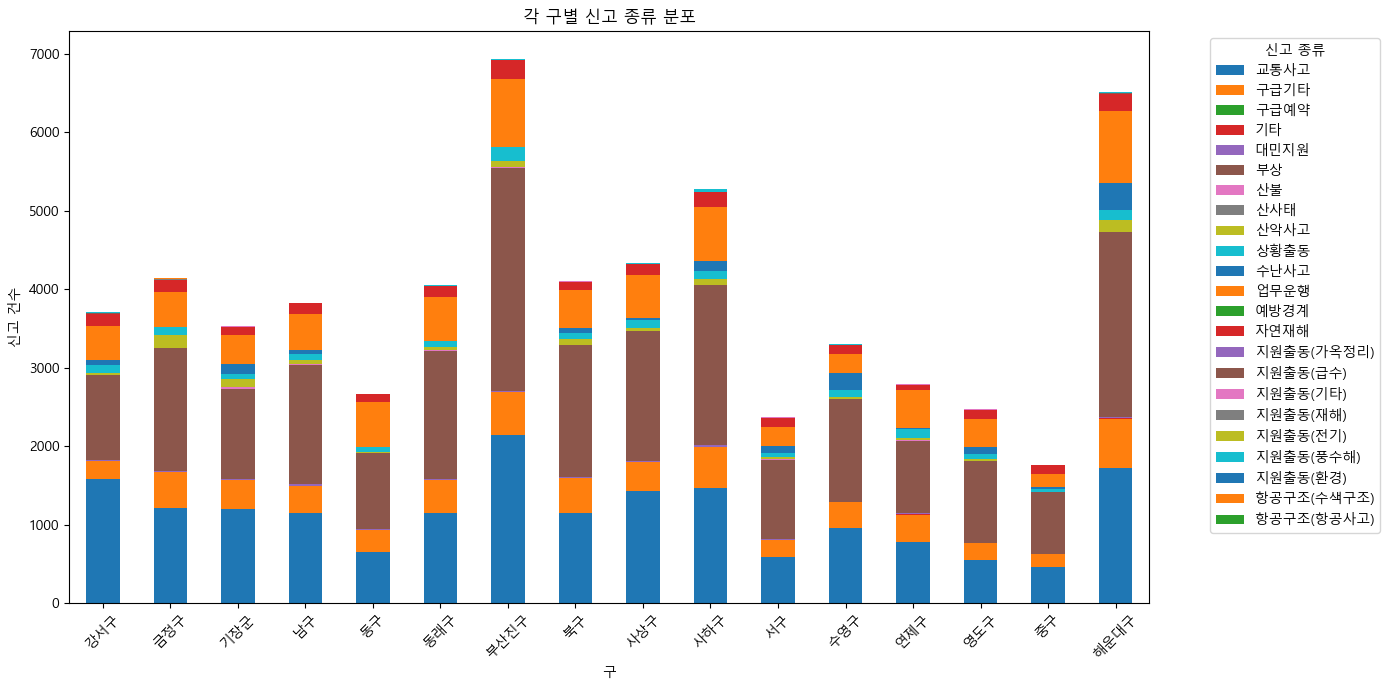

In [17]:
# Íµ¨Î≥Ñ Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Ïã†Í≥† Î∂ÑÌè¨
# Íµ¨Î≥Ñ(cat119_train.address_gu) x Ïã†Í≥†Ï¢ÖÎ•ò(cat119_train.cat) ÍµêÏ∞®Ìëú ÏÉùÏÑ±
cross_tab = pd.crosstab(cat['address_gu'], cat['sub_cat'])

# Í∑∏ÎûòÌîÑ ÌÅ¨Í∏∞ ÏÑ§Ï†ï
plt.figure(figsize=(14, 7))

# ÎàÑÏ†Å ÎßâÎåÄÍ∑∏ÎûòÌîÑ
cross_tab.plot(kind='bar', stacked=True, figsize=(14, 7))

plt.title('Í∞Å Íµ¨Î≥Ñ Ïã†Í≥† Ï¢ÖÎ•ò Î∂ÑÌè¨')
plt.xlabel('Íµ¨')
plt.ylabel('Ïã†Í≥† Í±¥Ïàò')
plt.xticks(rotation=45)
plt.legend(title='Ïã†Í≥† Ï¢ÖÎ•ò', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Figure size 1400x700 with 0 Axes>

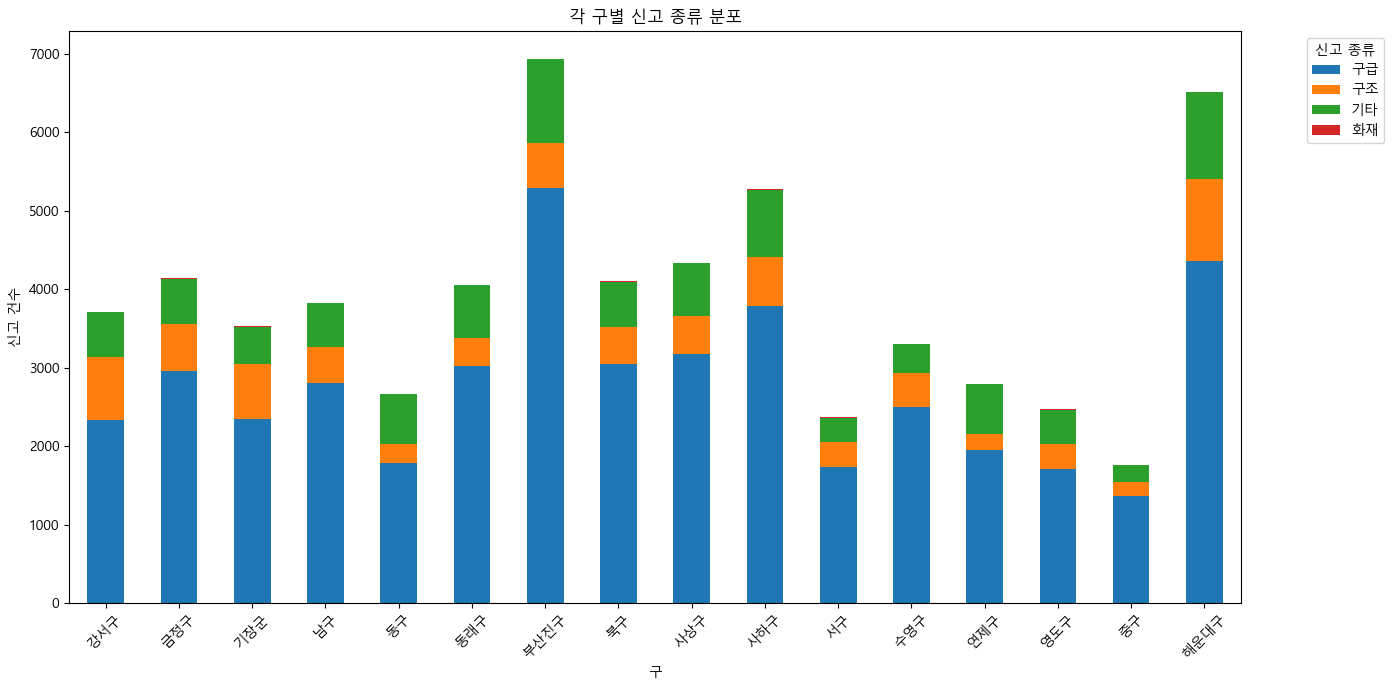

In [ ]:
# Íµ¨Î≥Ñ(address_gu) x Ïã†Í≥†Ï¢ÖÎ•ò(cat) ÍµêÏ∞®Ìëú ÏÉùÏÑ±
cross_tab = pd.crosstab(cat['address_gu'], cat['cat'])

# Í∑∏ÎûòÌîÑ ÌÅ¨Í∏∞ ÏÑ§Ï†ï
plt.figure(figsize=(14, 7))

# ÎàÑÏ†Å ÎßâÎåÄÍ∑∏ÎûòÌîÑ
cross_tab.plot(kind='bar', stacked=True, figsize=(14, 7))

plt.title('Í∞Å Íµ¨Î≥Ñ Ïã†Í≥† Ï¢ÖÎ•ò Î∂ÑÌè¨')
plt.xlabel('Íµ¨')
plt.ylabel('Ïã†Í≥† Í±¥Ïàò')
plt.xticks(rotation=45)
plt.legend(title='Ïã†Í≥† Ï¢ÖÎ•ò', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 2-3 Ï∂îÍ∞Ä Îç∞Ïù¥ÌÑ∞

In [ ]:
# population merge
popu = pd.read_excel('\ÏùºÎ≥Ñ ÌñâÏ†ïÎèô Ïó∞Î†π ÏÉùÌôúÏù∏Íµ¨ ÏõîÎ≥Ñ ÏùºÌèâÍ∑†.xlsx')

In [ ]:
# 1. Ïù∏Íµ¨ Îç∞Ïù¥ÌÑ∞ ÌñâÏ†ïÎèôÎ™Ö Íµ¨Î∂Ñ % Í∏∞Ï§Ä ÎÖÑÏõî Íµ¨Î∂Ñ
# address_gu/sub_address
# 'ÌñâÏ†ïÎèÑÎ™Ö'ÏùÑ ÎùÑÏñ¥Ïì∞Í∏∞Î•º Í∏∞Ï§ÄÏúºÎ°ú ÎÇòÎàî
data = df
popu_data = popu

popu_data[['address_gu', 'sub_address']] = popu['ÌñâÏ†ïÎèôÎ™Ö'].str.split(' ', n=1, expand=True)
popu_data[['year', 'month']] = popu['Í∏∞Ï§ÄÎÖÑÏõî'].str.split('-', n=1, expand=True)

# 2. Îç∞Ïù¥ÌÑ∞ Íµ¨Î∂ÑÏùÑ ÏúÑÌï¥, ÌïÑÏöîÏóÜÎäî Ïó¥ ÏÇ≠Ï†ú 
del popu_data['ÌñâÏ†ïÎèôÏΩîÎìú']
del popu_data['ÌñâÏ†ïÎèôÎ™Ö']
del popu_data['Í∏∞Ï§ÄÎÖÑÏõî']

# 3. ÏàòÏπòÌòï Î≥ÄÌôò 
cols_to_convert = ['ÌèâÍ∑†Ï£ºÍ±∞Ïù∏Íµ¨Ïàò', 'ÌèâÍ∑†ÏßÅÏû•Ïù∏Íµ¨Ïàò', 'ÌèâÍ∑†Î∞©Î¨∏Ïù∏Íµ¨Ïàò']
for col in cols_to_convert:
    popu_data[col] = popu_data[col].str.replace(',', '').astype(int)
popu_data['year'] = popu_data['year'].astype(int)
popu_data['month'] = popu_data['month'].astype(int)

# 4. Í∑∏Î£πÌôî Î∞è Ìï©Í≥Ñ ÏßëÍ≥Ñ
grouped = popu_data.groupby(['address_gu', 'sub_address', 'year', 'month'])[['ÌèâÍ∑†Ï£ºÍ±∞Ïù∏Íµ¨Ïàò', 'ÌèâÍ∑†ÏßÅÏû•Ïù∏Íµ¨Ïàò', 'ÌèâÍ∑†Î∞©Î¨∏Ïù∏Íµ¨Ïàò']].sum().reset_index()

# 5. Í≥†Ïú† Í∞í ÏßëÌï© ÎßåÎì§Í∏∞
set1 = set(grouped['sub_address'].unique()) # Ïù∏Íµ¨ Îç∞Ïù¥ÌÑ∞
set2 = set(data['sub_address'].unique())    # Ïò§Î¶¨ÏßÄÎÑê Îç∞Ïù¥ÌÑ∞ 
intersection = set1 & set2          # ÍµêÏßëÌï©
# ÏúÑÏóê ÍµêÏßëÌï©Ïóê Ìï¥ÎãπÌïòÏßÄ ÏïäÏùÄ sub_addressÎßå ÎÇ®ÍπÄ. 
filtered = data[~data['sub_address'].isin(intersection)]
sorted(filtered['sub_address'].unique())

# ÏûêÎèô Îß§Ïπ≠Ïù¥ ÎêòÏßÄ ÏïäÏùÄ ÏßÄÏó≠, ÏàòÎèô Îß§Ìïë ÏΩîÎìú 

# manual_mapping 
manual_mapping = {'Í∞ÄÏïºÎèô': 'Í∞ÄÏïº1Îèô'} # <-ÏòàÏãú ÏûêÎ£å: ÏßÄÏó≠Ïóê Í¥ÄÌïú Ï†ïÎ≥¥Î°ú ÏÉùÎûµ

# 6.ÏàòÎèô Îß§Ìïë Ï†ÅÏö© Ìï®Ïàò
def map_sub_address(row):
    if row['sub_address'] in intersection:
        return row['sub_address']
    else:
        return manual_mapping.get(row['sub_address'], row['sub_address'])  # ÏóÜÏúºÎ©¥ ÏõêÎûò Í∞í Ïú†ÏßÄ

data['mapped_sub_address'] = data.apply(map_sub_address, axis=1)

data['tm'] = pd.to_datetime(data['tm'], format = '%Y%m%d')

def preprocess_weather_data(df):
    import pandas as pd
    
    # ÎÇ†Ïßú ÌååÏÉù Î≥ÄÏàò
    df['year'] = df['tm'].dt.year
    df['month'] = df['tm'].dt.month
    df['day'] = df['tm'].dt.day
    df['weekday'] = df['tm'].dt.dayofweek
    return df

data = preprocess_weather_data(data)

# groupedÏóêÏÑú Îß§ÌïëÏùÑ ÏúÑÌï¥ Ïª¨ÎüºÎ™Ö Ï†ïÎ¶¨
grouped_renamed = grouped.rename(columns={'sub_address': 'mapped_sub_address'})

# Í∏∞Ï§Ä Ïª¨Îüº: sub_address, year, month
merge_keys = ['mapped_sub_address', 'year', 'month']

# 7. dataÏóê Ïù∏Íµ¨ Ï†ïÎ≥¥ Î≥ëÌï© (left join)
data_merged = data.merge(
    grouped_renamed[merge_keys + ['ÌèâÍ∑†Ï£ºÍ±∞Ïù∏Íµ¨Ïàò', 'ÌèâÍ∑†ÏßÅÏû•Ïù∏Íµ¨Ïàò', 'ÌèâÍ∑†Î∞©Î¨∏Ïù∏Íµ¨Ïàò']],
    on=merge_keys,
    how='left'
)

In [ ]:
# ÏµúÏ¢Ö Ï†ïÎ¶¨ Îç∞Ïù¥ÌÑ∞ 
train= pd.read_csv('\train_pop_data.csv',encoding='cp949')
test = pd.read_csv('\test_pop_data.csv',encoding='cp949')
sub = pd.read_csv('\test_call119.csv', encoding = 'cp949')

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61771 entries, 0 to 61770
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tm              61771 non-null  object 
 1   address_city    61771 non-null  object 
 2   address_gu      61771 non-null  object 
 3   sub_address     61771 non-null  object 
 4   stn             61771 non-null  int64  
 5   ta_max          61771 non-null  float64
 6   ta_min          61771 non-null  float64
 7   ta_max_min      61771 non-null  float64
 8   hm_min          61771 non-null  float64
 9   hm_max          61771 non-null  float64
 10  ws_max          61771 non-null  float64
 11  ws_ins_max      61771 non-null  float64
 12  rn_day          61771 non-null  float64
 13  cat             61771 non-null  object 
 14  sub_cat         61771 non-null  object 
 15  call_count      61771 non-null  int64  
 16  population      61771 non-null  int64  
 17  old_population  61771 non-null 

In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12739 entries, 0 to 12738
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tm              12739 non-null  object 
 1   address_city    12739 non-null  object 
 2   address_gu      12739 non-null  object 
 3   sub_address     12739 non-null  object 
 4   stn             12739 non-null  int64  
 5   ta_max          12739 non-null  float64
 6   ta_min          12739 non-null  float64
 7   ta_max_min      12739 non-null  float64
 8   hm_min          12739 non-null  float64
 9   hm_max          12739 non-null  float64
 10  ws_max          12739 non-null  float64
 11  ws_ins_max      12739 non-null  float64
 12  rn_day          12739 non-null  float64
 13  cat             12739 non-null  object 
 14  sub_cat         12739 non-null  object 
 15  population      12739 non-null  int64  
 16  old_population  12739 non-null  int64  
 17  ÌèâÍ∑†Ï£ºÍ±∞Ïù∏Íµ¨Ïàò         1

### 2-4 ÌååÏÉùÎ≥ÄÏàò ÏÉùÏÑ±

In [60]:
# target Î≥ÄÏàò Î∂ÑÎ¶¨
target = train.pop('call_count')

In [61]:
# tm Ï†ÑÏ≤òÎ¶¨ 
train['tm'] = pd.to_datetime(train['tm'])
test['tm'] = pd.to_datetime(test['tm'])

In [62]:
# ÎÖÑ, Ïõî, Ïùº, Ï£ºÎßê Ï∂îÏ∂ú
train['year'] = train['tm'].dt.year
train['month'] = train['tm'].dt.month
train['day'] = train['tm'].dt.day
train['weekday'] = train['tm'].dt.dayofweek

test['year'] = test['tm'].dt.year
test['month'] = test['tm'].dt.month
test['day'] = test['tm'].dt.day
test['weekday'] = test['tm'].dt.dayofweek

In [63]:
# stn Î¨∏ÏûêÏó¥ Î≥ÄÍ≤Ω 
train['stn'] = train['stn'].astype(str)
test['stn'] = test['stn'].astype(str)

In [64]:
# ÌíçÏÜç ÌèâÍ∑†
train['wind_mean'] = (train['ws_ins_max'] + train['ws_max']) / 2
test['wind_mean'] = (test['ws_ins_max'] + test['ws_max']) / 2

# ÏäµÎèÑ Î≤îÏúÑ
train['hm_range'] = train['hm_max'] - train['hm_min']
test['hm_range'] = test['hm_max'] - test['hm_min']

# Ïù¥ÎèôÌèâÍ∑† (Í∏∞Ïò®, ÏäµÎèÑ)
train['ta_max_3d_ma'] = train.groupby('address_gu')['ta_max'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())
train['hm_max_3d_ma'] = train.groupby('address_gu')['hm_max'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())
test['ta_max_3d_ma'] = test.groupby('address_gu')['ta_max'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())
test['hm_max_3d_ma'] = test.groupby('address_gu')['hm_max'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())

# Í∞ïÏàòÎüâ Íµ¨Í∞ÑÌôî
train['rn_day'] = train['rn_day'].apply(lambda x: 0 if x < 0 else x)
bins = [-0.1, 0, 10, 30, 70, train['rn_day'].max()]
labels = ['ÏóÜÏùå', 'ÏïΩÌïú ÎπÑ', 'Î≥¥ÌÜµ ÎπÑ', 'Í∞ïÌïú ÎπÑ', 'Îß§Ïö∞ Í∞ïÌïú ÎπÑ']
train['rn_day_bin'] = pd.cut(train['rn_day'], bins=bins, labels=labels)

test['rn_day'] = test['rn_day'].apply(lambda x: 0 if x < 0 else x)
bins = [-0.1, 0, 10, 30, 70, test['rn_day'].max()]
labels = ['ÏóÜÏùå', 'ÏïΩÌïú ÎπÑ', 'Î≥¥ÌÜµ ÎπÑ', 'Í∞ïÌïú ÎπÑ', 'Îß§Ïö∞ Í∞ïÌïú ÎπÑ']
test['rn_day_bin'] = pd.cut(test['rn_day'], bins=bins, labels=labels)


In [65]:
# ÏûêÏó∞Ïû¨Ìï¥ Ïó¨Î∂Ä
train['disaster_day'] = train['sub_cat'].isin(['ÏûêÏó∞Ïû¨Ìï¥','ÏßÄÏõêÏ∂úÎèô(ÌíçÏàòÌï¥']).astype(int)
test['disaster_day'] = test['sub_cat'].isin(['ÏûêÏó∞Ïû¨Ìï¥','ÏßÄÏõêÏ∂úÎèô(ÌíçÏàòÌï¥']).astype(int)

In [ ]:
# ÏΩîÎ°úÎÇò ÏòÅÌñ•Í∂å Ïó¨Î∂Ä
train['is_covid_year'] = (train['year'] == 2020).astype(int)
test['is_covid_year'] = (test['year'] == 2020).astype(int)

In [67]:
# ÏßÄÏó≠ Í∑∏Î£π Î∂ÑÎ•ò Í∏∞Ï§Ä Ï†ïÏùò
coastal = ['Ìï¥Ïö¥ÎåÄÍµ¨', 'ÏàòÏòÅÍµ¨', 'ÏòÅÎèÑÍµ¨', 'Ï§ëÍµ¨', 'ÎèôÍµ¨', 'ÏÑúÍµ¨', 'ÎÇ®Íµ¨']
urban = ['Î∂ÄÏÇ∞ÏßÑÍµ¨', 'ÎèôÎûòÍµ¨', 'Ïó∞Ï†úÍµ¨']
mountain = ['Í∏àÏ†ïÍµ¨', 'Í∏∞Ïû•Íµ∞']
mountain = ['Í∏àÏ†ïÍµ¨', 'Í∏∞Ïû•Íµ∞']
lowland = ['Í∞ïÏÑúÍµ¨', 'Î∂ÅÍµ¨', 'ÏÇ¨ÏÉÅÍµ¨', 'ÏÇ¨ÌïòÍµ¨']

# Í∞Å ÏßÄÏó≠ Í∑∏Î£πÏóê Ìï¥ÎãπÌïòÎäîÏßÄ Ïó¨Î∂ÄÎ•º Ïù¥ÏßÑ Î≥ÄÏàòÎ°ú ÏßÅÏ†ë ÏÉùÏÑ±
for df in [train, test]:
    df['region_coastal'] = df['address_gu'].isin(coastal).astype(int)
    df['region_urban'] = df['address_gu'].isin(urban).astype(int)
    df['region_mountain'] = df['address_gu'].isin(mountain).astype(int)
    df['region_lowland'] = df['address_gu'].isin(lowland).astype(int)

### 2-5 ÏÉÅÍ¥ÄÎ∂ÑÏÑù

In [69]:
train.columns = ['tm', 'address_city', 'address_gu', 'sub_address', 'stn', 'ta_max',
       'ta_min', 'ta_max_min', 'hm_min', 'hm_max', 'ws_max', 'ws_ins_max',
       'rn_day', 'cat', 'sub_cat', 'population', 'old_population', 'mean_live_pop',
       'mean_work_pop', 'mean_visit_pop', 'year', 'month', 'day', 'weekday', 'wind_mean',
       'hm_range', 'ta_max_3d_ma', 'hm_max_3d_ma', 'rn_day_bin',
       'disaster_day', 'is_covid_year', 'region_coastal', 'region_urban',
       'region_mountain', 'region_lowland']

In [74]:
test.columns = ['tm', 'address_city', 'address_gu', 'sub_address', 'stn', 'ta_max',
       'ta_min', 'ta_max_min', 'hm_min', 'hm_max', 'ws_max', 'ws_ins_max',
       'rn_day', 'cat', 'sub_cat', 'population', 'old_population', 'mean_live_pop',
       'mean_work_pop', 'mean_visit_pop', 'year', 'month', 'day', 'weekday', 'wind_mean',
       'hm_range', 'ta_max_3d_ma', 'hm_max_3d_ma', 'rn_day_bin',
       'disaster_day', 'is_covid_year', 'region_coastal', 'region_urban',
       'region_mountain', 'region_lowland']

In [75]:
numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns

# ÏàòÏπòÌòï Î≥ÄÏàòÎßå ÌïÑÌÑ∞ÎßÅ
train_numeric = train[numeric_cols]
cols_to_drop = ['region_coastal', 'region_urban', 'region_mountain', 'region_lowland']

train_numeric = train_numeric.drop(columns=cols_to_drop)
train_corr = train_numeric.corr()

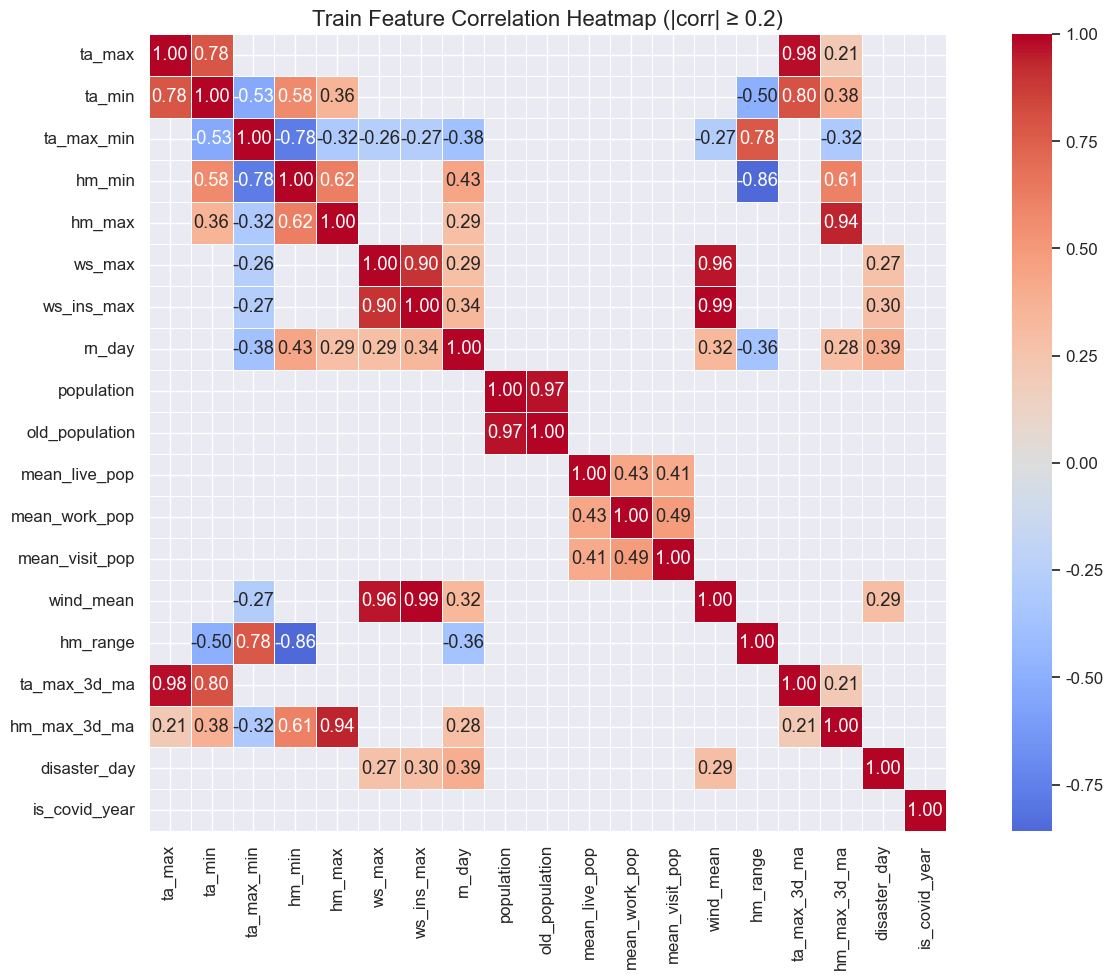

In [76]:
# ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌñâÎ†¨ Í≥ÑÏÇ∞ 
# Ï†àÎåìÍ∞í 0.2 ÎØ∏ÎßåÏù∏ Í∞íÏùÄ NaNÏúºÎ°ú ÏÑ§Ï†ï
filtered_corr = train_corr.mask(train_corr.abs() < 0.2)

plt.figure(figsize=(14, 10))
sns.set(font_scale=1.1)

sns.heatmap(
    filtered_corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    square=True,
    cbar=True
)

plt.title("Train Feature Correlation Heatmap (|corr| ‚â• 0.2)", fontsize=16)
plt.tight_layout()
plt.show()

- ÎÜíÏùÄ ÏÉÅÍ¥Ä Í¥ÄÍ≥ÑÍ∞Ä ÎÇòÌÉÄÎÇòÎäî 'ws_ins_max','ta_max_3d_ma','hm_max_3d_ma' Ï†úÍ±∞


### 2-6 Î∂àÌïÑÏöî ÏπºÎüº Ï†úÍ±∞

In [ ]:
# ÏÇ≠Ï†úÌï† Ïó¥ Î™©Î°ù
cols_to_drop = [
    'cat', 'sub_cat',                                # Îç∞Ïù¥ÌÑ∞ ÎàÑÏÑ§ Î∞©ÏßÄ 
    'ws_ins_max','ta_max_3d_ma','hm_max_3d_ma',      # ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ≥ÑÏàòÏóê ÏùòÌï¥ ÏÇ≠Ï†ú
    'address_city','rn_day_bin'                      # Î≥ÄÏàò Ï§ëÏöîÎèÑ ÎÇÆÏùå.
    ]

# dropÏúºÎ°ú Ï≤òÎ¶¨
train = train.drop(columns=cols_to_drop, errors='ignore')
test = test.drop(columns=cols_to_drop, errors='ignore')

In [38]:
train.columns

Index(['tm', 'address_gu', 'sub_address', 'stn', 'ta_max', 'ta_min',
       'ta_max_min', 'hm_min', 'hm_max', 'ws_max', 'rn_day', 'population',
       'old_population', 'mean_live_pop', 'mean_work_pop', 'mean_visit_pop',
       'year', 'month', 'day', 'weekday', 'wind_mean', 'hm_range',
       'disaster_day', 'is_covid_year', 'region_coastal', 'region_urban',
       'region_mountain', 'region_lowland'],
      dtype='object')

### 2-7 ÏàòÏπòÌòï Ï≤òÎ¶¨

In [78]:
from sklearn.preprocessing import MinMaxScaler

num_cols = train.select_dtypes(include = ['int', 'float']).columns
date_cols = ['year', 'month', 'day', 'weekday']
cols = [x for x in num_cols if x not in date_cols]

scaler = MinMaxScaler()
train[cols] = scaler.fit_transform(train[cols])
test[cols] = scaler.transform(test[cols])

### 2-8 Î≤îÏ£ºÌòï Ï≤òÎ¶¨

In [79]:
# Î≤îÏ£ºÌòï Ï≤òÎ¶¨
cat_cols = ['address_gu', 'sub_address', 'stn']
train[cat_cols] = train[cat_cols].astype('category')
test[cat_cols] = test[cat_cols].astype('category')

### 2-9 Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†

In [80]:
X = train.drop(columns = ['tm'])

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, target, test_size = 0.2, random_state = 0)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((49416, 27), (12355, 27), (49416,), (12355,))

# 3. Î™®Îç∏ÎßÅ

- hyper parameter
- ‚úÖ Best Parameters:

{'iterations': 1172, 'depth': 6, 'learning_rate': 0.0038166161833928687, 'l2_leaf_reg': 6.178500608595952, 'bagging_temperature': 0.4169323820127707, 'random_strength': 2.6137903340558464, 'border_count': 211}

In [47]:
best_params = {
    "loss_function": "Poisson",
    "iterations": 1172,
    "depth": 6,
    "learning_rate": 0.0038166161833928687,
    "l2_leaf_reg": 6.178500608595952,
    "bagging_temperature": 0.4169323820127707,
    "random_strength": 2.6137903340558464,
    "border_count": 211,
    "cat_features": cat_cols,
    "random_state": 0,
    "verbose": 100
}

In [ ]:
# optuna

def objective(trial):
    # ÌäúÎãùÌï† ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Î≤îÏúÑ Ï†ïÏùò
    params = {
        "loss_function": "Poisson",
        "random_state": 0,
        "verbose": 0,
        "iterations": trial.suggest_int("iterations", 300, 1500),
        "depth": trial.suggest_int("depth", 4, 10),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.3, log=True),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1, 10),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0.0, 1.0),
        "random_strength": trial.suggest_float("random_strength", 1e-9, 10),
        "border_count": trial.suggest_int("border_count", 32, 255),
    }

    # CatBoostRegressor ÌõàÎ†®
    model = CatBoostRegressor(**params, cat_features=cat_cols)
    model.fit(X_train, y_train)

    # ÏòàÏ∏° Î∞è ÏÑ±Îä• ÌèâÍ∞Ä
    y_pred = model.predict(X_val)
    rmse = root_mean_squared_error(y_val, y_pred)  
    return rmse

# Optuna Study Ï†ïÏùò Î∞è Ïã§Ìñâ
study = optuna.create_study(direction="minimize", study_name="CatBoost_Tuning")
study.optimize(objective, n_trials=50, timeout=600)  

# ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞ Ï∂úÎ†•
print("‚úÖ Best Trial:")
print(study.best_trial)

print("‚úÖ Best Parameters:")
print(study.best_params)

In [49]:
# model fit
cat_model = CatBoostRegressor(**best_params)
cat_model.fit(X_train, y_train)

0:	learn: 0.9992474	total: 57.4ms	remaining: 1m 7s
100:	learn: 0.9417885	total: 5.52s	remaining: 58.5s
200:	learn: 0.9087567	total: 11s	remaining: 53.2s
300:	learn: 0.8897065	total: 16.7s	remaining: 48.2s
400:	learn: 0.8786329	total: 22.4s	remaining: 43s
500:	learn: 0.8711150	total: 28.2s	remaining: 37.8s
600:	learn: 0.8659324	total: 34.1s	remaining: 32.4s
700:	learn: 0.8623014	total: 40s	remaining: 26.9s
800:	learn: 0.8596692	total: 46.3s	remaining: 21.4s
900:	learn: 0.8577101	total: 52.4s	remaining: 15.8s
1000:	learn: 0.8562361	total: 58.7s	remaining: 10s
1100:	learn: 0.8550050	total: 1m 4s	remaining: 4.18s
1171:	learn: 0.8542783	total: 1m 9s	remaining: 0us


In [50]:
# Valid Í≤ÄÏ¶ù 
y_pred = cat_model.predict(X_val)

from sklearn.metrics import mean_absolute_error, r2_score

print("üìä MAE:", mean_absolute_error(y_val, y_pred))
print("üìä RMSE:", root_mean_squared_error(y_val, y_pred))
print("üìä R2:", r2_score(y_val, y_pred))

üìä MAE: 0.4379130944948917
üìä RMSE: 0.979870968639383
üìä R2: 0.4523045591438587


# 4. Î™®Îç∏ ÏòàÏ∏° Î∞è Ï†ÄÏû•

In [51]:
# Ï†ÄÏû•
X_test = test.drop(columns = ['tm'])
pred = cat_model.predict(X_test)
pred = np.round(pred).astype(int)

test['call_count'] = pred

In [52]:
test_group = test.groupby(
    ['tm', 'address_gu', 'sub_address'],
    observed=True  # ÎòêÎäî observed=False
)['call_count'].sum().reset_index()

test_group = test_group.rename(columns={
    'tm': 'TM'
})

In [ ]:

sub = pd.read_csv('\test_call119.csv', encoding = 'cp949')
sub['TM'] = pd.to_datetime(sub['TM'], format='%Y%m%d')

In [55]:
submit = pd.merge(
    sub,
    test_group,
    how='left',
    on=['TM', 'address_gu', 'sub_address']
)
sub['call_count'] = submit['call_count_y']

In [ ]:
sub.to_csv('\250237.csv', index = False, encoding = 'cp949')

# 5. SHAP

In [56]:
# Tree Í∏∞Î∞ò Î™®Îç∏: TreeExplainer ÏÇ¨Ïö©
explainer = shap.TreeExplainer(cat_model) 

# SHAP Í∞í Í≥ÑÏÇ∞ (X_trainÏùÄ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïùò feature set)
shap_values = explainer.shap_values(X_train)

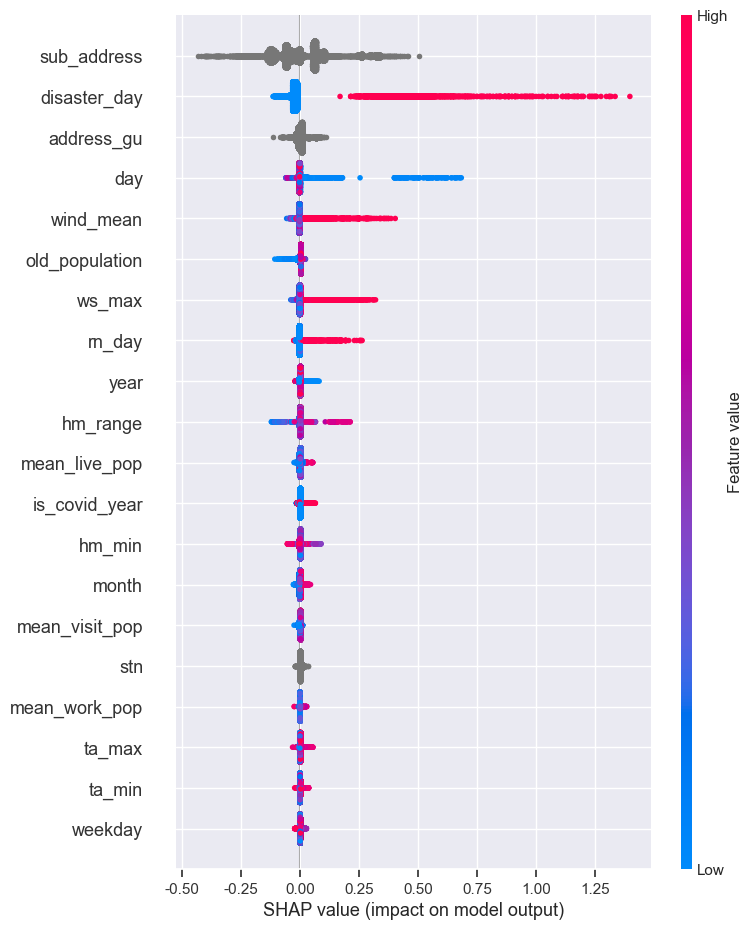

In [57]:
# ÏöîÏïΩ ÌîåÎ°Ø (Ï†ÑÏ≤¥ feature ÏòÅÌñ•ÎèÑ)
shap.summary_plot(shap_values, X_train)